<a href="https://colab.research.google.com/github/DherismaHanindita/Machine-Learning_Prediksi-Analisis/blob/main/UAS_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image
Image(url='https://assets.mitsubishi-motors.co.id/articles/1565867067-6jpeg.jpeg', width=600)

Pada tugas besar kedua Pembelajaran masin ini, akan dilakukan klasifikasi (*supervised learning*) terhadap data Kendaraan Motor milik Dealer untuk melakukan prediksi
apakah pelanggan untuk membeli kendaraan atau tidak berdasarkan dataset yang disediakan. Pada percobaan klasifikasi dataset tersebut, kami menggunakan
beberapa model untuk mengklasifikasikan dataset berdasarkan ketertarikan pelanggan untuk membeli kendaraan atau tidak.

**Deskripsi fitur pada dataset**

Penjelasan dari fitur-fitur dataset :
1. id : identitas pelanggan yang terdaftar
2. jenis_kelamin : jenis kelamin
3. umur : umur
4. SIM : kepemilikan SIM
5. kode daerah : kode daerah tempat tinggal pelanggan
6. sudah asuransi : sudah pernah asuransi / belum
7. umur kendaraan : umur kendaraan
8. kendaraan rusak : mobil pelanggan pernah rusak atau belum
9. premi : jumlah premi yang harus dibayarkan
10. kanal penjualan : kode kanal untuk menghubungi pelanggan (email, telpon, dll)
11. lama berlangganan : durasi pelanggan menjadi klien perusahaan
12. tertarik : tertarik atau tidak tertarik

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('bmh')

*Data training* nantinya akan digunakan untuk melatih algoritma dalam mencari model yang sesuai, sedangkan *data testing* akan dipakai untuk menguji dan mengetahui performa model yang didapatkan pada tahapan testing.

In [ ]:
#Panggil file (load file bernama Stock.csv) dan simpan dalam dataframe
dataset_train = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/UAS/datasets/kendaraan_train.csv"
dataset_test = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/UAS/datasets/kendaraan_test.csv"
dataTrain = pd.read_csv(dataset_train)
dataTest = pd.read_csv(dataset_test)

In [ ]:
dataTrain.head(10)
# dataTrain.shape

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


In [ ]:
dataTest.head(10)
# dataTest.shape

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
5,Pria,26,1,28,1,< 1 Tahun,Tidak,42721,152,198,0
6,Wanita,24,1,28,1,< 1 Tahun,Tidak,65801,152,160,0
7,Wanita,40,1,28,0,1-2 Tahun,Pernah,30981,26,79,0
8,Pria,23,1,15,1,< 1 Tahun,Tidak,32365,152,219,0
9,Wanita,43,1,28,0,1-2 Tahun,Pernah,65380,25,41,1


In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


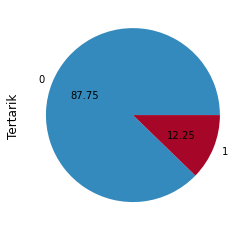

In [ ]:
dataTrain['Tertarik'].value_counts().plot.pie(autopct='%.2f')

imbalanced dataset

In [ ]:
cols = ['id','SIM']
dataTrain[cols].hist(figsize=(12,8), bins=10, xlabelsize=8, ylabelsize

SyntaxError: ignored

In [ ]:

temp_y = pd.DataFrame(y)
temp_y

,Tertarik
0,0
1,0
2,0
3,0
4,0
...,...
285826,0
285827,0
285828,0
285829,0


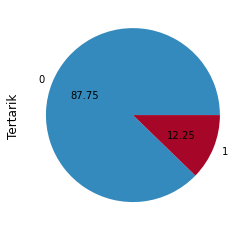

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# pelanggan tertarik
iya = temp_y.apply(lambda x: True if x['Tertarik'] == 1 else False , axis=1)
# Count number of True in series
numOfRows = len(iya[iya == True].index)
print('Number of Rows in dataframe that tertarik is 1 : ', numOfRows)

Number of Rows in dataframe that tertarik is 1 :  35006


In [ ]:
# pelanggan tidak tertarik
iya = temp_y.apply(lambda x: True if x['Tertarik'] == 0 else False , axis=1)
# Count number of True in series
numOfRows = len(iya[iya == True].index)
print('Number of Rows in dataframe that tertarik is 0 : ', numOfRows)
     

Number of Rows in dataframe that tertarik is 0 :  250825


Keterangan :
data cukup tidak seimbang antara label. dimana pelanggan yang tidak tertarik (label 'Tertarik' == 0) lebih banyak dari pelanggan yang tertarik.

    tidak tertarik ~ 87.75 % / 250825 pelanggan
    tertarik ~ 12.25 % / 35006 pelanggan

